***Spring 2017 Data Bootcamp Final Project by Colleen Jin dj928, Yingying Chen yc1875***
# Analysis On Relation Between Real-time News Sentiment And Stock Market Portfolio


![title](titlepic3.png)

**In this project, we use two sets of data to draw insights on how media sentiment can be an indicator for the financial sector. For the financial data, we plan to use daily return of the market index <font color='green'>(^GSPC)</font>, which is a good indicator for market fluctuation; for media sentiment, we use summarized information of news pieces from top 10 most popular press because of their stronger influence in shaping people's perception of events that are happening in the world.**

**Both sets of data are real-time, which means the source files are of the moment and need to be loaded each time analysis is performed. The sentiment analysis library returns a <font color='green'>polarity</font> score (-1.0 to 1.0) and a <font color='green'>subjectivity</font> score (0.0 to 1.0) on the news stories. Using quantified sentiment analysis, we juxtapose the two time series of data and observe if they present any correlation and search for potential causality. For example, we may test the hypothesis that when polarity among the daily news posts is higher (a.k.a., positive), the financial market that same day is more likely to rise. The rest of the notebook is a step-by-step instruction.**

### Modules used in this notebook:
1. **[TextBlob](https://textblob.readthedocs.io/en/dev/): its library provides an API for common natural language processing <font color='green'>(NLP)</font> tasks, including part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, etc.**
2. **[Non-Parametric Regression](http://pythonhosted.org/PyQt-Fit/NonParam_tut.html): a category of regression analysis in which the predictor does not take a predetermined form but is constructed according to information derived from the data.**
3. **[WordCloud](https://pypi.python.org/pypi/wordcloud)**

### Data sources: 
1. **[News API](https://newsapi.org/): We use a news api provided by [NewsAPI.org](https://newsapi.org/) to load real-time news headlines (in the form of JSON metadata), then apply methods mainly from Python's [TextBlob](https://textblob.readthedocs.io/en/dev/) module to conduct sentiment analysis. We seleced 10 publish houses by their popularity (please see the ranking of news press [here](http://www.ebizmba.com/articles/news-websites))**.
2. **[S&P 500](https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC) index open and closing price derived from Yahoo Finance**.

In [1]:
%matplotlib inline                     
# import necessary packages
import pandas as pd                    
import matplotlib.pyplot as plt        
from pandas_datareader import data
from datetime import datetime
import numpy as np
from textblob import TextBlob
import csv

from wordcloud import WordCloud,ImageColorGenerator
#from scipy.misc import imread
import string

# PART 1: NEWS COLLECTION - pd.read_json()
**We use <font color='green'>pd.read_json()</font> to import real-time news information (top 10 posts from each publisher). These news items are stored separately as dataframes and combined into one collective dataframe. (News API powered by [NewsAPI.org](https://newsapi.org/)**)**

**The news press consists of **
* [CNN](http://www.cnn.com/), 
* [The New York Times](https://www.nytimes.com/), 
* [Washington Post](https://www.washingtonpost.com/), 
* [BBC News](http://www.bbc.com/news), 
* [ABC News](http://abcnews.go.com/),
* [Financial Times](https://www.ft.com/),
* [Bloomberg](https://www.bloomberg.com/).

In [3]:
cnn = pd.read_json('https://newsapi.org/v1/articles?source=cnn&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518')
nyt= pd.read_json('https://newsapi.org/v1/articles?source=the-new-york-times&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518')
wsp=pd.read_json('https://newsapi.org/v1/articles?source=the-washington-post&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518')
bbc=pd.read_json("https://newsapi.org/v1/articles?source=bbc-news&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
abc=pd.read_json("https://newsapi.org/v1/articles?source=abc-news-au&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
#google = pd.read_json(" https://newsapi.org/v1/articles?source=google-news&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
ft = pd.read_json("https://newsapi.org/v1/articles?source=financial-times&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
bloomberg = pd.read_json("https://newsapi.org/v1/articles?source=bloomberg&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
economist = pd.read_json("https://newsapi.org/v1/articles?source=the-economist&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
wsj = pd.read_json("https://newsapi.org/v1/articles?source=the-wall-street-journal&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")

In [4]:
total = [wsj, cnn, nyt, wsp, bbc, abc, ft, bloomberg, economist]
total1 = pd.concat(total, ignore_index=True)
total1

,articles,sortBy,source,status
0,"{'author': 'Carol E. Lee', 'title': 'Trump Urg...",top,the-wall-street-journal,ok
1,"{'author': 'Peter Nicholas', 'title': 'Taxes, ...",top,the-wall-street-journal,ok
2,"{'author': 'Ben Dummett', 'title': 'Huntsman, ...",top,the-wall-street-journal,ok
3,"{'author': 'David Benoit', 'title': 'Arconic B...",top,the-wall-street-journal,ok
4,"{'author': 'Gregory Zuckerman', 'title': 'The ...",top,the-wall-street-journal,ok
5,"{'author': 'Christina Rogers', 'title': 'Ford ...",top,the-wall-street-journal,ok
6,"{'author': 'Jonathan Cheng', 'title': 'North K...",top,the-wall-street-journal,ok
7,"{'author': 'Peter Rudegeair', 'title': 'Bond B...",top,the-wall-street-journal,ok
8,"{'author': 'Christopher Mims', 'title': 'All I...",top,the-wall-street-journal,ok
9,"{'author': 'David Harrison', 'title': 'Much-Ma...",top,the-wall-street-journal,ok


**Some values may be missing in the <font color='green'>article</font> column. For example, if there is no imformation of the key <font color='green'>author</font> of news pieces from BBC, it will indicates <font color='green'>None</font> where the <font color='green'>author</font> information should have been. Therefore, we need to convert <font color='green'>Nonetype</font> entries to string type, because the <font color='green'>.append()</font> method for a <font color='green'>list</font> cannot pass values of <font color='green'>Nonetype</font>. We will use <font color='green'>.append()</font> method later for displaying sentiment analysis results.**

In [5]:
k = 0
while k < len(total1):
    if total1['articles'][k]['description'] is None:
        total1['articles'][k]['description'] = 'None'
    k += 1

j = 0
while j < len(total1):
    print(type(total1['articles'][j]['description']))
    j += 1
# now all entries are of type string, regardless whether there is real contents.

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [6]:
l = 0
while l < len(total1):
    if total1['articles'][l]['title'] is None:
        total1['articles'][l]['title'] = 'None'
    l += 1

p = 0
while p < len(total1):
    print(type(total1['articles'][p]['title']))
    p += 1
# now all entries are of type string, regardless whether there is real contents.

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

**Contents of the column named <font color='green'>articles</font> are of <font color='green'>dict</font> type; each row contains information including <font color='green'>author</font>, <font color='green'>title</font>, <font color='green'>description</font>, <font color='green'>url</font>, <font color='green'>urlToImage</font> and <font color='green'>publishedAt</font>, among which <font color='green'>title</font> is selected for main analysis.**

In [7]:
# write the news posts into a new .csv file   
n_rows = len(total1.index)
articles = total1['articles']
result = csv.writer(open('result.csv','a'))
result.writerow(['PublishedAt','Title','description'])
for i in range(0,n_rows): 
    line = [articles[i]['publishedAt'],articles[i]['title'],articles[i]['description']]
    result.writerow(line)

# print the first item in the 'articles' series as an example.
articles[0]

{'author': 'Carol E. Lee',
 'description': 'President Donald Trump called on Muslim leaders across the globe to confront the “crisis of Islamic extremism,” in a speech aimed at corralling Arab allies around a new, combined effort to combat terrorism and Iranian aggression in the Middle East.',
 'publishedAt': '2017-05-21T09:34:00Z',
 'title': 'Trump Urges Muslims to Fight Extremism in Saudi Speech',
 'url': 'https://www.wsj.com/articles/trumps-saudi-speech-to-mark-bid-to-ease-muslim-tensions-1495359283',
 'urlToImage': 'https://si.wsj.net/public/resources/images/BN-TN568_34Nro_TOP_20170521053456.jpg'}

In [8]:
# type of each entry in the 'articles' column is 'dict'
type(articles[0])

dict

In [9]:
# keys of the 'dict' variables are 'author', 'publishedAt', 'urlToImage', 'description', 'title', 'url'
articles[0].keys()

dict_keys(['author', 'title', 'description', 'url', 'urlToImage', 'publishedAt'])

** The <font color='green'>tags</font> method performs part-of-speech tagging (for example, <font color='green'>NNP</font> stands for a singular proper noun).**

In [10]:
blob = TextBlob(str(articles[0]['title']))
blob.tags

[('Trump', 'NNP'),
 ('Urges', 'NNP'),
 ('Muslims', 'NNP'),
 ('to', 'TO'),
 ('Fight', 'NNP'),
 ('Extremism', 'NNP'),
 ('in', 'IN'),
 ('Saudi', 'NNP'),
 ('Speech', 'NNP')]

**A loop prints all the news titles, which are later used for sentiment analysis.**

In [11]:
i = 0
while i < n_rows:
    blob = TextBlob(articles[i]['title'])
    print(1 + i, ". ", blob, sep = "")
    i += 1

1. Trump Urges Muslims to Fight Extremism in Saudi Speech
2. Taxes, Budget Are Focus for Trump Despite Probes
3. Huntsman, Clariant Near Deal to Merge
4. Arconic Board Vote to Test Power of Activist Investors
5. The Quants Run Wall Street Now
6. Ford Considering Significant Management Changes to Address Stock Price Decline
7. North Korea Steps Up Pace of Missile Tests
8. Bond Buyers Forgive and Forget, Flock Back to Online Lenders’ Debt
9. All IT Jobs Are Cybersecurity Jobs Now
10. Much-Maligned U.S. Infrastructure Shows Signs of Improvement
11. Abroad, President Trump's reality collides with candidate Trump's words
12. Trump's new tune on Islam unconvincing, experts say
13. Trump's two minds on Islam
14. Bergen: The real reason Saudis rolled out the reddest of red carpets
15. Trump called a hypocrite for Saudi King bow - CNN Video
16. Tillerson holds briefing in Saudi Arabia without US press
17. Roger Stone: Trump's Saudi award 'makes me want to puke'
18. Immigrants eye Canada as US d

**All descriptions for the 100 news posts are printed in the same way as above; their presence is useful for adding accuracy for our sentiment analysis by providing more words on the same topic as the titles.**

In [12]:
j = 0
while j < n_rows:
    blob1 = TextBlob(str(articles[j]['description']))
    print(1 + j, ". ", blob1, sep = "")
    j += 1

1. President Donald Trump called on Muslim leaders across the globe to confront the “crisis of Islamic extremism,” in a speech aimed at corralling Arab allies around a new, combined effort to combat terrorism and Iranian aggression in the Middle East.
2. President Trump’s policy agenda faces tests this week as he looks to shift the focus from Russia investigations to his plans for boosting U.S. military power and revamping the tax code.
3. Huntsman and Switzerland’s Clariant are near an agreement to merge, an all-stock deal that would create a chemicals giant with a combined market value of about $14 billion.
4. The future of Arconic Inc. is up for grabs this week in a tightly fought shareholder vote that will test the growing power of activist investors.
5. For decades, investors imagined a time when data-driven traders would dominate financial markets. That day has arrived.
6. Ford is considering significant changes to its senior leadership team amid tension among top executives, dis

# PART 2: WORD CLOUD

**A word cloud of news tiltles can provide us with a direct and vivid impression of the most frequently discussed topics in today's news reports. Topic/person/event that prevails among the top news pieces appears in the largest font, occupies the center space and displays the most salient colors.**

**In a visually pleasant way, a word cloud gives us a hint for the news sentiment of the day.**
#### Code referred to https://github.com/amueller/word_cloud/blob/master/examples/simple.py

In [13]:
#write the csv file into a txt file called entire_text.txt
contents = csv.reader(open('result.csv','r'))
texts = open('entire_text.txt','w')
list_of_text = []
for row in contents:
    line = row[2].encode('utf-8')
    line = str(line.decode())
    list_of_text.append(line)
texts.writelines(list_of_text)

In [14]:
text=open("entire_text.txt",'r')
text=text.read()
wordcloud = WordCloud().generate(text)

(-0.5, 399.5, 199.5, -0.5)

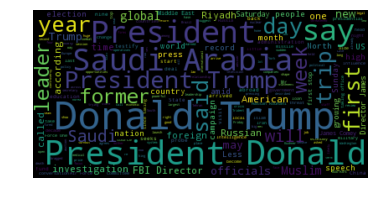

In [15]:
#display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

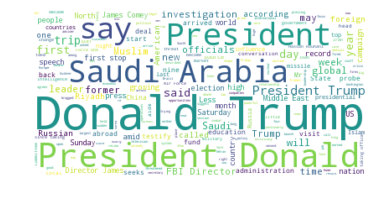

In [16]:
# increase max_font_size and change backgroud color to white 
wordcloud = WordCloud(max_font_size=40).generate(text)
wordcloud = WordCloud(max_words=200,background_color='white',max_font_size=100).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# PART 3: SENTIMENT ANALYSIS
**We use <font color='green'>.sentiment</font> method from <font color='green'>TextBlob</font> to calculate polatiry and subjectivity of each <font color='green'>title</font>.
The <font color='green'>sentiment</font> property returns an output in the form of <font color='green'>namedtuple</font> (`Sentiment(polarity, subjectivity)`). The polarity score is a float within the range `[-1.0, 1.0]`. The subjectivity is a float within the range `[0.0, 1.0]` where `0.0` is very objective and `1.0` is very subjective.**

In [17]:
# a loop to show sentiment analysis results of the 100 titles
n = 0
while n < n_rows:
    print(TextBlob(articles[n]['title']).sentiment)
    n += 1

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.375, subjectivity=0.875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.15000000000000002)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.166

**From the TextBlob module, the <font color='green'>.sentiment</font> method returns results in the form of <font color='green'>namedtuples</font>. Elements in <font color='green'>namedtuples</font> can only be printed after being appended into the form of a <font color='green'>list</font>. Therefore, we use a <font color='green'>list</font> named <font color='green'>tests_title</font> to store all the results from our sentiment tests on the news titles.**

In [18]:
N = 0
tests_title = []

while N < n_rows:
    tests_title.append(TextBlob(articles[N]['title']).sentiment)
    N += 1

**We create a list named <font color='green'>list_polarity_title</font> to store polarity scores for news titles.**

In [19]:
list_polarity_title = [] # this list contains all titles polarity scores.

for test in tests_title:
    list_polarity_title.append(test.polarity) 

** Similarly, we create a list of subjectivity scores for news titles.**

In [20]:
list_subjectivity_title = [] # this list contains all titles subjectivity scores.

for test in tests_title:
    list_subjectivity_title.append(test.subjectivity)

### 'description'

**We use <font color='green'>.sentiment</font> method again to calculate <font color='green'>polarity</font> and <font color='green'>subjectivity</font> of each <font color='green'>description</font>. As mentioned above, analysis on descritions make the final results more versatile and hopefully more accurate.**

In [21]:
m = 0
while m < n_rows:
    print(TextBlob(articles[m]['description']).sentiment)
    m += 1

Sentiment(polarity=0.06818181818181818, subjectivity=0.22727272727272727)
Sentiment(polarity=-0.1, subjectivity=0.1)
Sentiment(polarity=0.05, subjectivity=0.7)
Sentiment(polarity=-0.08928571428571429, subjectivity=0.20535714285714285)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4375, subjectivity=0.6875)
Sentiment(polarity=0.4125, subjectivity=0.5900000000000001)
Sentiment(polarity=-0.005208333333333332, subjectivity=0.3104166666666667)
Sentiment(polarity=0.22727272727272724, subjectivity=0.3159090909090909)
Sentiment(polarity=-0.022222222222222216, subjectivity=0.45555555555555555)
Sentiment(polarity=-0.15000000000000002, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.25, subjectivity=0.65)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3111111111111111, subjectivity=0.6944444444444445)
Sentiment(polarity=0.0, subjectivity=0.0)
Sen

In [22]:
M = 0
tests_description = []

while M < n_rows:
    tests_description.append(TextBlob(articles[M]['description']).sentiment)
    M += 1

**We create a list of polarity scores for news descriptions by appending each polarity score to the list named <font color='green'>list_polarity_description</font>.**

In [23]:
list_polarity_description = [] # this list contains all descriptions' polarity scores.

for test in tests_description:
    list_polarity_description.append(test.polarity)

**Same as above, we create a list of subjectivity for news descriptions.**

In [24]:
list_subjectivity_description = [] # this list contains all descriptions' subjectivity scores.

for test in tests_description:
    list_subjectivity_description.append(test.subjectivity)

**Now we have four lists of data:**
1. list_polarity_title
2. list_subjectivity_title
3. list_polarity_description
4. list_subjectivity_description

**We convert the four lists of data into one dataframe for drawing plots.**

In [25]:
total_score = [list_polarity_title, list_subjectivity_title, list_polarity_description, list_subjectivity_description]
labels = ['T_polarity', 'T_subjectivity', 'D_polarity', 'D_subjectivity']
df = pd.DataFrame.from_records(total_score, index = labels)
df

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
T_polarity,0.000000,0.0,0.10,0.000000,0.0,0.3750,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.033333,0.0,0.00,0.00,0.100000,0.0,-0.333333,0.000000
T_subjectivity,0.000000,0.0,0.40,0.000000,0.0,0.8750,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.066667,0.0,0.00,0.00,0.533333,0.0,0.666667,0.000000
D_polarity,0.068182,-0.1,0.05,-0.089286,0.0,0.4375,0.4125,-0.005208,0.227273,-0.022222,...,0.000000,0.0,0.116667,1.0,0.00,-0.35,0.000000,0.0,-0.050000,0.000000
D_subjectivity,0.227273,0.1,0.70,0.205357,0.0,0.6875,0.5900,0.310417,0.315909,0.455556,...,0.144444,0.0,0.133333,1.0,0.75,0.45,0.000000,0.0,0.400000,0.066667


**We transpose the dataframe to make it compatible with the .plot() method.**

In [26]:
df = df.transpose() 
df

,T_polarity,T_subjectivity,D_polarity,D_subjectivity
0,0.000000,0.000000,0.068182,0.227273
1,0.000000,0.000000,-0.100000,0.100000
2,0.100000,0.400000,0.050000,0.700000
3,0.000000,0.000000,-0.089286,0.205357
4,0.000000,0.000000,0.000000,0.000000
5,0.375000,0.875000,0.437500,0.687500
6,0.000000,0.000000,0.412500,0.590000
7,0.000000,0.000000,-0.005208,0.310417
8,0.000000,0.000000,0.227273,0.315909
9,0.000000,0.000000,-0.022222,0.455556


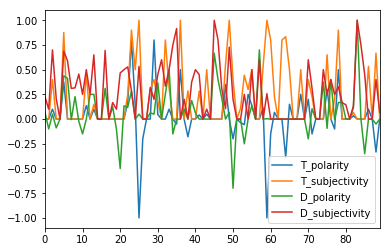

In [27]:
# this plot shows scores for all 100 news posts.
df.plot()

## -Analysis by news press
**Apparently, the 100 news posts standing alone aren't of much information. For a better perspective, we need to group scores by the press they belong to, under the assumption that posts from the same press are much more likely to embed a uniform tone. We create a list names <font color='green'>new_T_polarity</font> to store the sum of polarity scores of news titles for each press. The we do the same operation on subjectivity scores.**

In [28]:
c_T_polarity = df['T_polarity']
new_T_polarity = []
B = 0
C = 0
while B < n_rows:
    sum = 0
    while C < B + 10:
        sum += c_T_polarity[C]
        C += 1
    new_T_polarity.append(sum)
    B += 10
new_T_polarity
# The press are in the order as: wsj, cnn, nyt, wsp, bbc, abc, google, ft, bloomberg and economist.

[0.47499999999999998,
 0.23636363636363636,
 0.70303030303030312,
 0.41688311688311686,
 0.44166666666666665,
 -0.79310064935064928,
 -0.070707070707070718,
 0.75,
 -0.20000000000000001]

In [29]:
c_T_subjectivity = df['T_subjectivity']
new_T_subjectivity = []
D = 0
E = 0
while D < n_rows:
    sum = 0
    while E < D + 10:
        sum += c_T_subjectivity[E]
        E += 1
    new_T_subjectivity.append(sum)
    D += 10
new_T_subjectivity

[1.2749999999999999,
 0.6045454545454545,
 3.3499999999999996,
 2.5872294372294373,
 2.3333333333333335,
 3.2883928571428571,
 3.6606060606060606,
 2.375,
 1.2666666666666666]

In [30]:
c_D_polarity = df['D_polarity']
new_D_polarity = []
F = 0
G = 0
while F < n_rows:
    sum = 0
    while G < F + 10:
        sum += c_D_polarity[G]
        G += 1
    new_D_polarity.append(sum)
    F += 10
new_D_polarity

[0.97873827561327553,
 0.68611111111111112,
 0.19783333333333331,
 1.2541666666666667,
 1.4098484848484847,
 -0.11006493506493509,
 0.0,
 0.91386784511784513,
 0.71666666666666667]

In [31]:
c_D_subjectivity = df['D_subjectivity']
new_D_subjectivity = []
H = 0
I = 0
while H < n_rows:
    sum = 0
    while I < H + 10:
        sum += c_D_subjectivity[I]
        I += 1
    new_D_subjectivity.append(sum)
    H += 10
new_D_subjectivity

[3.5920111832611838,
 2.6111111111111112,
 2.8307777777777776,
 4.125,
 3.9911616161616159,
 1.8071428571428572,
 0.0,
 2.8028619528619525,
 2.9444444444444446]

In [32]:
total_score_bypublishhouse = [new_T_polarity, new_T_subjectivity, new_D_polarity, new_D_subjectivity]
df1 = pd.DataFrame.from_records(total_score_bypublishhouse, index = labels)
df1

,0,1,2,3,4,5,6,7,8
T_polarity,0.475000,0.236364,0.703030,0.416883,0.441667,-0.793101,-0.070707,0.750000,-0.200000
T_subjectivity,1.275000,0.604545,3.350000,2.587229,2.333333,3.288393,3.660606,2.375000,1.266667
D_polarity,0.978738,0.686111,0.197833,1.254167,1.409848,-0.110065,0.000000,0.913868,0.716667
D_subjectivity,3.592011,2.611111,2.830778,4.125000,3.991162,1.807143,0.000000,2.802862,2.944444


In [33]:
# change the column labels to press house.
new_columns = ['wsj', 'cnn', 'nyt', 'wsp', 'guardian', 'abc', 'ft', 'bloomberg', 'economist']
df1.columns = new_columns
df1

,wsj,cnn,nyt,wsp,guardian,abc,ft,bloomberg,economist
T_polarity,0.475000,0.236364,0.703030,0.416883,0.441667,-0.793101,-0.070707,0.750000,-0.200000
T_subjectivity,1.275000,0.604545,3.350000,2.587229,2.333333,3.288393,3.660606,2.375000,1.266667
D_polarity,0.978738,0.686111,0.197833,1.254167,1.409848,-0.110065,0.000000,0.913868,0.716667
D_subjectivity,3.592011,2.611111,2.830778,4.125000,3.991162,1.807143,0.000000,2.802862,2.944444


### Graph for scores by news press

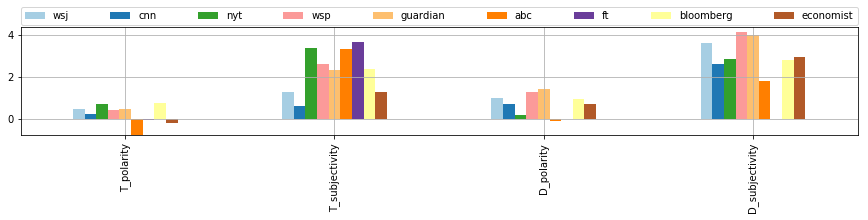

In [34]:
#colors = [(x/10.0, x/20.0, 0.75) for x in range(n_rows)]

df1.plot(kind = 'bar', legend = True, figsize = (15, 2), colormap='Paired', grid = True)

# place the legend above the subplot and use all the expended width.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=10, mode="expand", borderaxespad=0.)

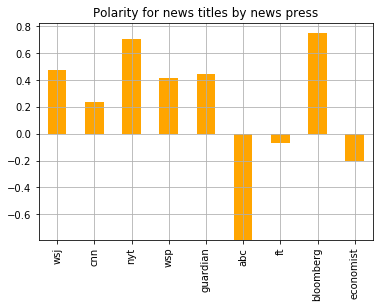

In [35]:
bar_color = 'orange'

row = df1.iloc[0]
row.plot(kind = 'bar', title = "Polarity for news titles by news press", color = bar_color, grid = True)

## -Analysis by date
**We have loaded news titles and descriptions over 2 weeks and stored them in a csv file called all_news.csv. We then calculated an average news polarity score for each day. We then then graph news polarity score to see how it has changed over time.**

In [36]:
contents = csv.reader(open('all_news.csv','r', encoding = "ISO-8859-1"))
result = csv.writer(open('entire_result.csv','w'))

In [37]:
#result.writerow(['Date','polarity'])   
for row in contents:
    comment = row[1]  
    blob = TextBlob(comment)
    polarity = blob.sentiment.polarity
    line = [row[0],polarity]
    result.writerow(line)   

In [42]:
data = pd.read_csv('entire_result.csv')
data=data.rename(columns = {'0.0':'polarity'})
data.tail(10)

,Date,polarity
2214,5/13/17,0.0
2215,5/13/17,0.0
2216,5/13/17,0.3
2217,5/13/17,0.0
2218,5/13/17,0.0
2219,5/13/17,0.0
2220,5/13/17,0.0
2221,5/13/17,0.0
2222,5/13/17,0.0
2223,5/13/17,0.3


In [44]:
#group the data by date
data=data.groupby('Date', as_index=False)['polarity'].mean()  
#convert column "Date" to a date data type 
data['Date'] = pd.to_datetime(data['Date'])
#sort the data by date ascending
data=data.sort_values(by="Date", axis=0, ascending=True, inplace=False, kind='quicksort')
#data
data

,Date,polarity
0,2017-03-24,0.000000
10,2017-04-09,-0.141667
1,2017-04-11,-0.035714
2,2017-04-12,0.183333
3,2017-04-13,-0.006919
4,2017-04-14,0.066439
5,2017-04-15,0.000000
6,2017-04-27,0.211607
7,2017-04-28,0.025203
8,2017-04-29,-0.017475


### Graph for scores by date

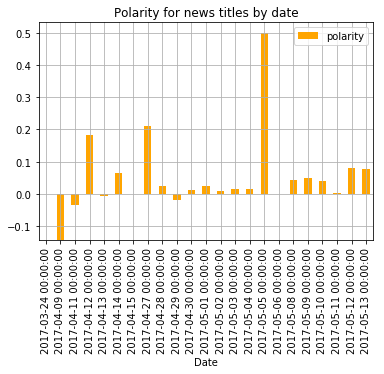

In [45]:
data.plot(x=data["Date"],kind = 'bar',title='Polarity for news titles by date',grid = True, color = 'orange')

# Part 4: S&P 500 INDEX
**Using the <font color='green'>yahoo_finance</font> module in Python, we will eventually compare the sentiment analysis of the news posts with the movement of the market index.**

In [41]:
from yahoo_finance import Share

# '^GSPC' is the market symble for S&P 500 Index
yahoo = Share('^GSPC')
print(yahoo.get_open())

2371.37


In [46]:
print(yahoo.get_price())

2381.73


In [47]:
print(yahoo.get_trade_datetime())

2017-05-19 20:40:00 UTC+0000


In [49]:
from pprint import pprint
pprint(yahoo.get_historical('2017-04-09', '2017-05-14'))

YQLResponseMalformedError: Response malformed.

**We create a .csv file called yahoo.csv to store the financial data upon each import.**

In [51]:
from yahoo_finance import Share
yahoo = Share('^GSPC')
dataset = yahoo.get_historical('2017-04-27','2017-05-13')
result = csv.writer(open('yahoo.csv','w'))
result.writerow(['Date','Low','High'])
for i in range(0,len(dataset)):
    line = [dataset[i]['Date'],dataset[i]['Low'],dataset[i]['High']]
    result.writerow(line)

YQLResponseMalformedError: Response malformed.

In [120]:
yahoo = pd.read_csv('yahoo.csv')
yahoo

,Date,Low,High
0,2017-05-09,2392.439941,2403.870117
1,2017-05-08,2393.919922,2401.360107
2,2017-05-05,2389.379883,2399.290039
3,2017-05-04,2380.350098,2391.429932
4,2017-05-03,2379.750000,2389.820068
5,2017-05-02,2385.820068,2392.929932
6,2017-05-01,2384.830078,2394.489990
7,2017-04-28,2382.360107,2393.679932
8,2017-04-27,2382.679932,2392.100098


In [121]:
#convert column "Date" to a date data type
yahoo['Date'] = pd.to_datetime(yahoo['Date'])
#sort the data by date ascending
yahoo=yahoo.sort_values(by="Date", axis=0, ascending=True, inplace=False, kind='quicksort')
yahoo

,Date,Low,High
8,2017-04-27,2382.679932,2392.100098
7,2017-04-28,2382.360107,2393.679932
6,2017-05-01,2384.830078,2394.489990
5,2017-05-02,2385.820068,2392.929932
4,2017-05-03,2379.750000,2389.820068
3,2017-05-04,2380.350098,2391.429932
2,2017-05-05,2389.379883,2399.290039
1,2017-05-08,2393.919922,2401.360107
0,2017-05-09,2392.439941,2403.870117


In [122]:
type(data['Date'])
type(yahoo['Date'])

pandas.core.series.Series

# PART 5 CORRELATION BETWEEN NEWS POLARITY AND S&P 500

In [123]:
#join yahoo and data together on "Date"
result = pd.merge(data, yahoo,on='Date')
result

,Date,polarity,Low,High
0,2017-04-27,-0.021875,2382.679932,2392.100098
1,2017-04-28,0.077340,2382.360107,2393.679932
2,2017-05-01,0.025641,2384.830078,2394.489990
3,2017-05-02,0.032199,2385.820068,2392.929932
4,2017-05-03,-0.000268,2379.750000,2389.820068
5,2017-05-04,0.022727,2380.350098,2391.429932


In [124]:
result_len = len(result)

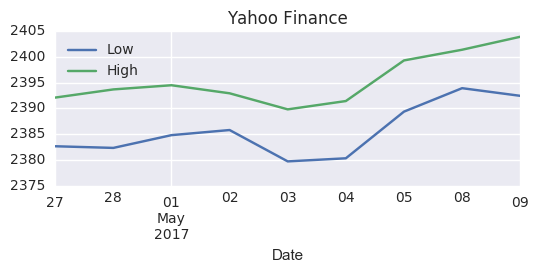

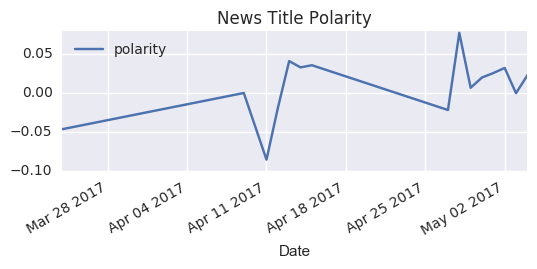

In [125]:
yahoo.plot(x="Date",figsize=(6, 2),title='Yahoo Finance')
data.plot(x='Date',figsize=(6, 2),title='News Title Polarity')

###  Estimate correlation between polarity scores and S&P500 index

In [126]:
import numpy
low=result['Low']
high=result['High']
polarity=result['polarity']
numpy.corrcoef(low, polarity) 
#from the data we have, we can conclude that news polarity and S&P500 index are positively correlated 

array([[ 1.        ,  0.21469213],
       [ 0.21469213,  1.        ]])

In [127]:
numpy.corrcoef(high, polarity)

array([[ 1.        ,  0.54956514],
       [ 0.54956514,  1.        ]])

In [128]:
numpy.corrcoef(high, low)

array([[ 1.        ,  0.77905387],
       [ 0.77905387,  1.        ]])

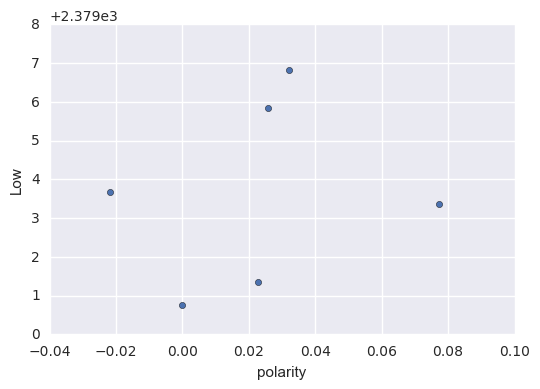

In [129]:
#a scatterplot for news polarity and Yahoo daily return of the market index
result.plot.scatter(x="polarity", y="Low")


### A parametic estimation for Yahoo daily return by news polarity

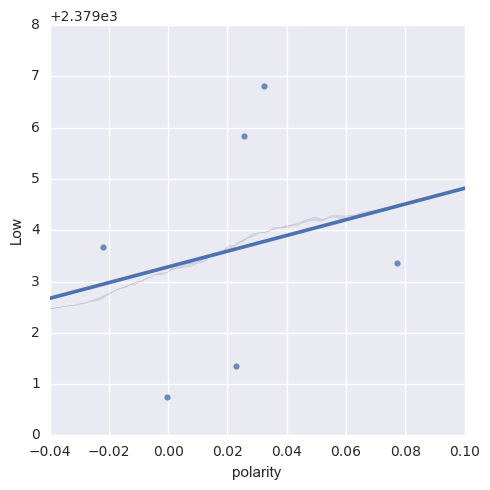

In [130]:
#a parametic estimation for Yahoo daily return by news polarity
import seaborn as sns
#lmplot plots the data with the regression coefficient through it.
sns.lmplot(x="polarity", y="Low", data=result, ci=0.95) #ci stands for confidence interval 

### A non-parametic estimation for Yahoo daily return by news polarity

In [131]:
import pyqt_fit.nonparam_regression as smooth
from pyqt_fit import npr_methods

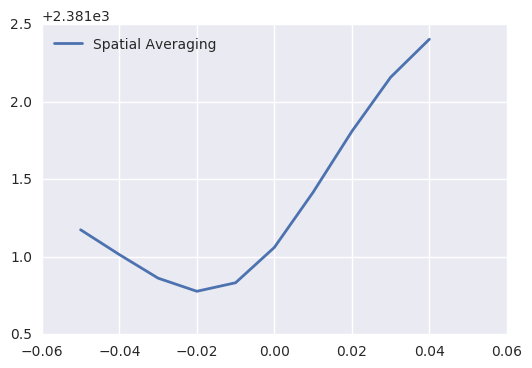

In [132]:
k0 = smooth.NonParamRegression(polarity, low, method=npr_methods.SpatialAverage())
k0.fit()
grid = np.r_[-0.05:0.05:0.01]
plt.plot(grid, k0(grid), label="Spatial Averaging", linewidth=2)
plt.legend(loc='best')